## Script até aqui

In [ ]:
caminho_dados = '/content/drive/MyDrive/Curso AD/dados_viagens/2023_Viagem.csv'

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Lendo os dados
df_viagens = pd.read_csv(caminho_dados, encoding='Windows-1252', sep=';', decimal=',')

# Criando nova coluna de despesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

# Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

# Convertendo colunas de datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

# Criando novas colunas de datas
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days


# Criando tabela consolidada
df_viagens_consolidado = (df_viagens
 .groupby('Cargo')
 .agg(
    despesa_media=('Despesas', 'mean'),
    duracao_media=('Dias de viagem', 'mean'),
    despesas_totais=('Despesas', 'sum'),
    destino_mais_frequente=('Destinos', pd.Series.mode),
    n_viagens=('Nome', 'count')
    )
 .reset_index()
 .sort_values(by='despesas_totais', ascending=False))

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

In [ ]:
df_final

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
494,NÃO IDENTIFICADO,3261.98,8.02,1047014709.49,Brasília/DF,320975
443,Informações protegidas por sigilo,3125.72,7.37,369297630.96,Informações protegidas por sigilo,118148
569,PROFESSOR DO MAGISTERIO SUPERIOR,2031.42,3.83,110699956.30,Brasília/DF,54494
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,1401.33,2.34,52454765.16,Brasília/DF,37432
315,CONTRATADO LEI 8745/93 - NI,984.45,2.84,17510463.07,Bauru/SP,17787
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,1465.85,2.06,24306782.30,Brasília/DF,16582
72,ANALISTA AMBIENTAL,2595.93,5.14,35302045.45,Brasília/DF,13599
179,ASSISTENTE EM ADMINISTRAçãO,1291.29,2.15,15082280.15,Brasília/DF,11680
776,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
686,TECNICO DO SEGURO SOCIAL,4299.22,11.36,45756570.47,Brasília/DF,10643


## Nosso primeiro gráfico
Vamos plotar um gráfico de barras da proporção de viagens por cargo:

<Axes: xlabel='Cargo'>

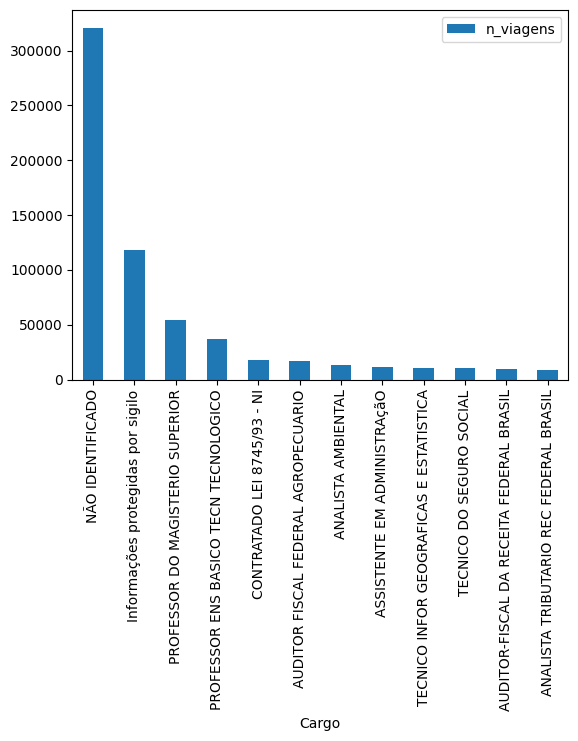

In [ ]:
df_final.plot(x='Cargo', y='n_viagens', kind='bar')

Ficou interessante, mas podemos melhorar.

Plotar gráficos diretamente pelo Pandas é limitado, vamos aprender a plotar usando o **matplotlib**.

In [ ]:
import matplotlib.pyplot as plt

## Matplotlib
- Biblioteca de Python para plotar gráficos
- Não é a única, mas é a mais famosa
- Usa os conceitos de `Figure` (imagem inteira) e `Axes` (área do gráfico)

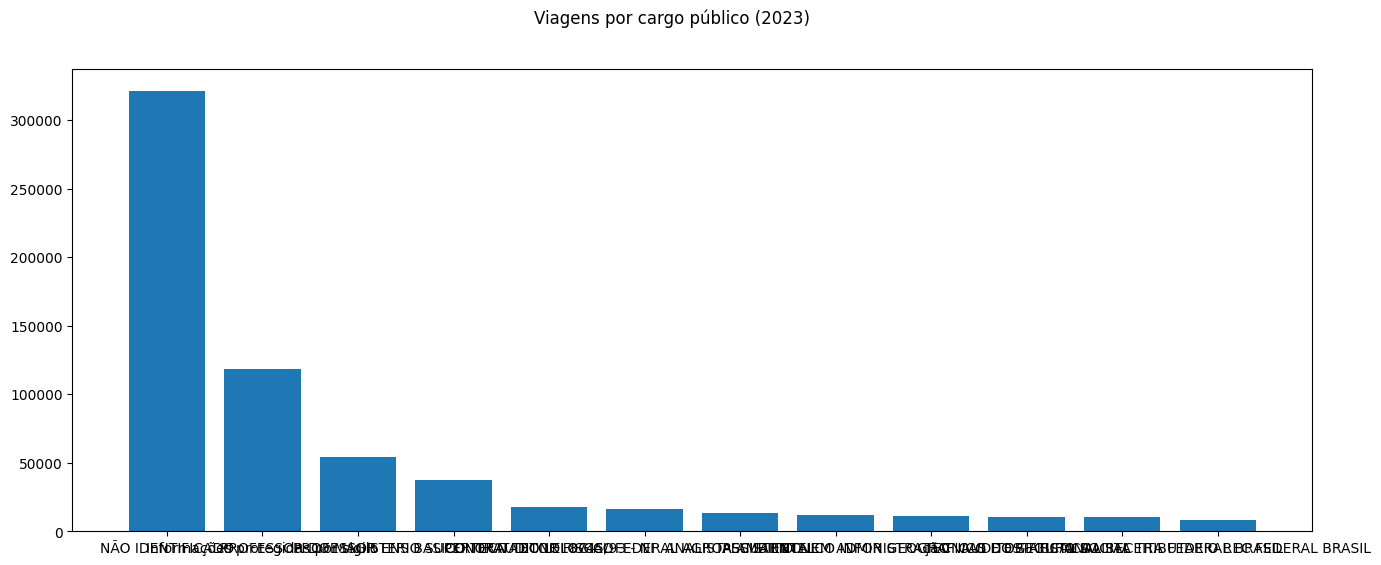

In [ ]:
# Gera uma figura do tamanho especificado
fig, ax = plt.subplots(figsize=(16, 6))

# Plota um gráfico de barras - passamos as colunas do eixo X e Y!
ax.bar(df_final['Cargo'], df_final['n_viagens'])

# Gera título da figura
fig.suptitle('Viagens por cargo público (2023)')

# Visualiza o gráfico (opcional no Notebook)
plt.show()

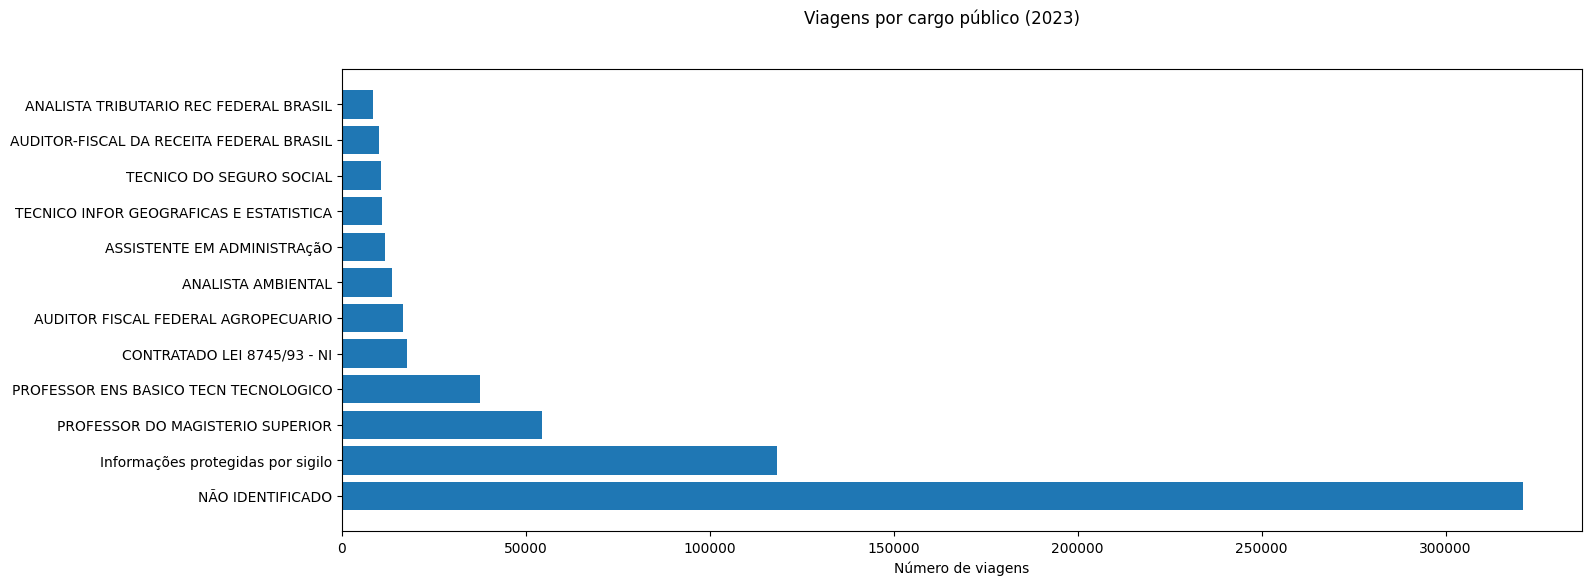

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

# Novo gráfico: barras horizontais
ax.barh(df_final['Cargo'], df_final['n_viagens'])

fig.suptitle('Viagens por cargo público (2023)')

# Ajustando rótulo no eixo X
plt.xlabel('Número de viagens')

plt.show()

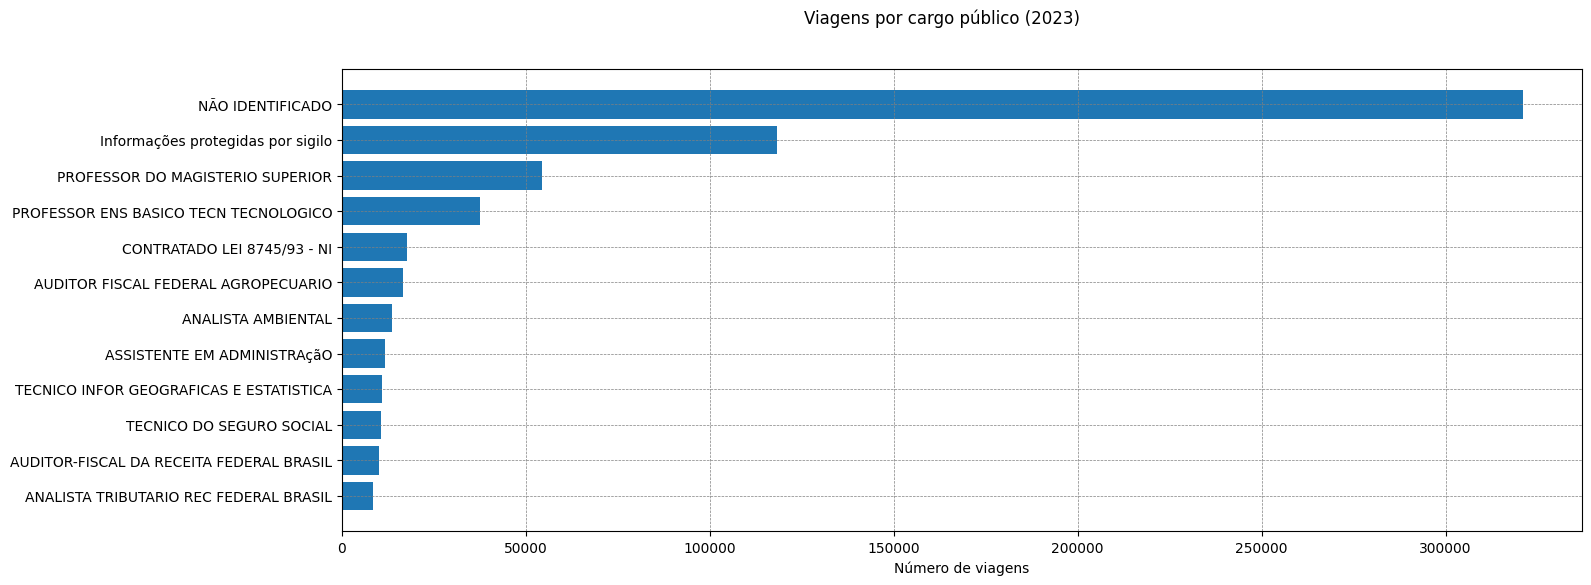

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

# Inverter eixo Y (maior em cima)
ax.barh(df_final['Cargo'], df_final['n_viagens'])
ax.invert_yaxis()

fig.suptitle('Viagens por cargo público (2023)')

# Gera "grid" no gráfico - teste com outras cores e estilos!
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Número de viagens')
plt.show()

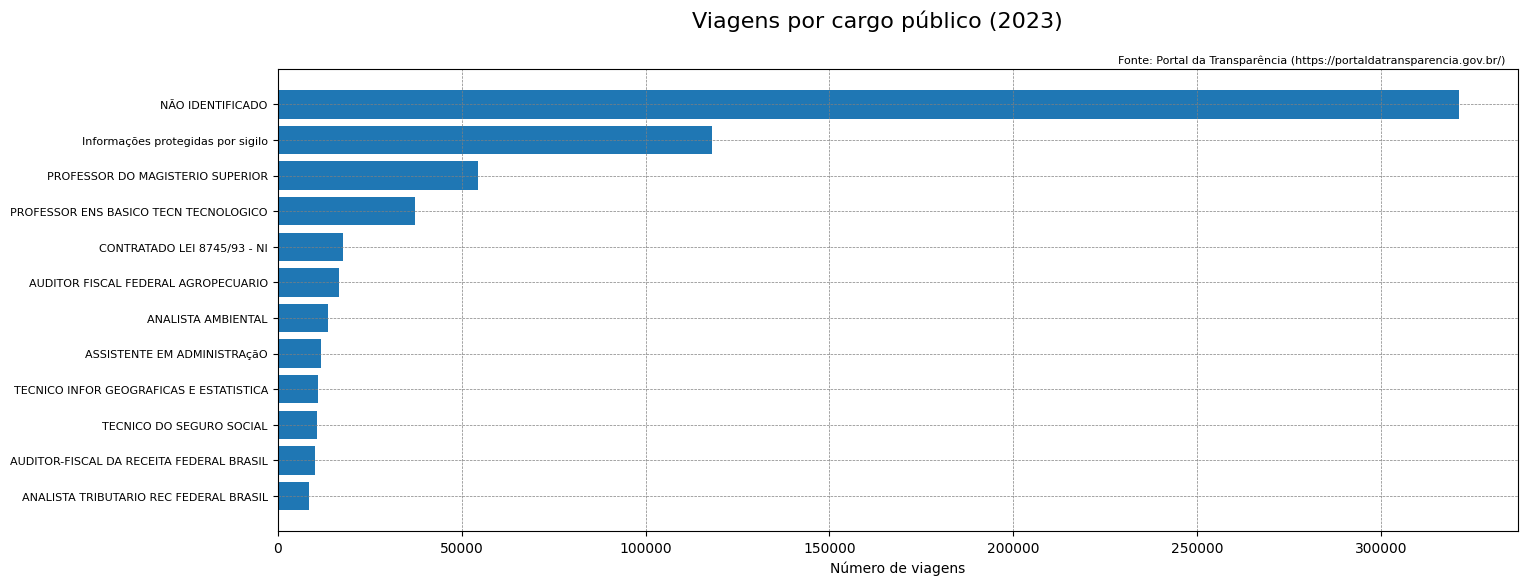

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(df_final['Cargo'], df_final['n_viagens'])
ax.invert_yaxis()

fig.suptitle('Viagens por cargo público (2023)', fontsize=16)

# Adiciona texto explicativo
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência (https://portaldatransparencia.gov.br/)', fontsize=8)

# Ajusta tamanho dos rótulos
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)

plt.xlabel('Número de viagens')
plt.show()

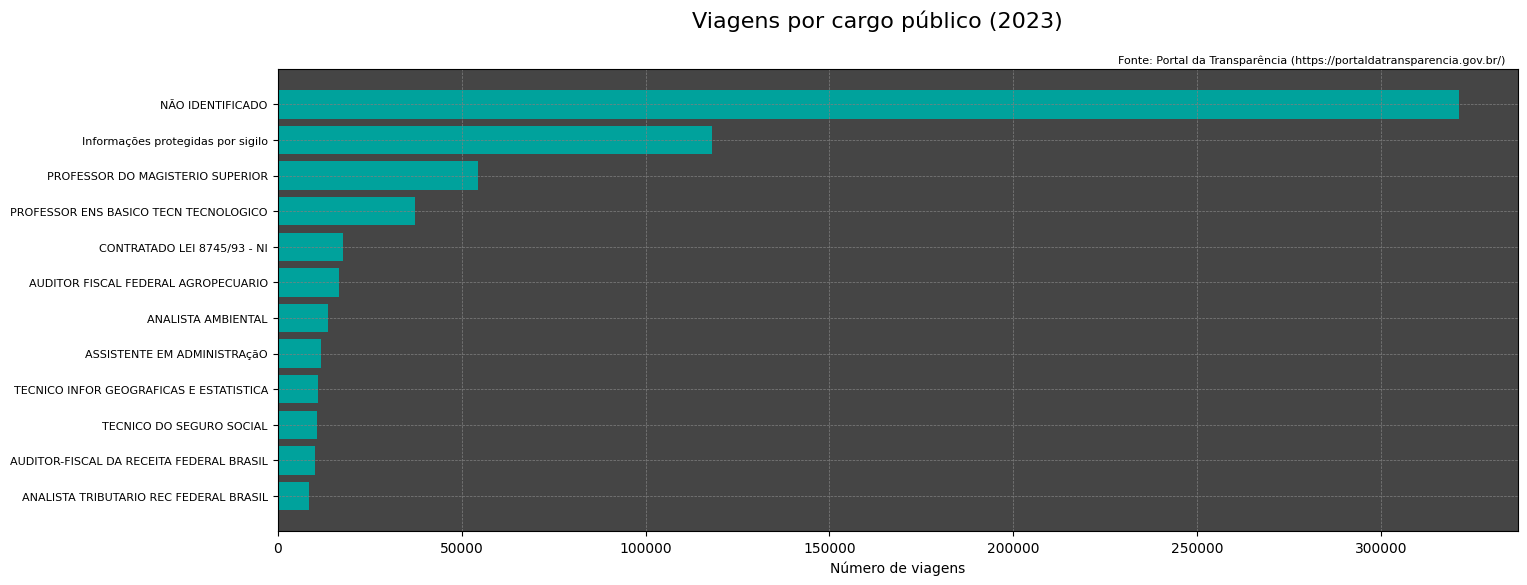

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(df_final['Cargo'], df_final['n_viagens'], color='#00A29C')
ax.invert_yaxis()
ax.set_facecolor('#454545')

fig.suptitle('Viagens por cargo público (2023)', fontsize=16)

plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência (https://portaldatransparencia.gov.br/)', fontsize=8)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)

plt.xlabel('Número de viagens')
plt.show()

## Outras possibilidades
Vimos aqui como customizar **um** gráfico a partir de **uma** análise de dados.
- Há muitas outas análises para fazer nos dados!
- Muitos outros tipos de gráfico para gerar!

### Exemplo: despesa média por cargo
Apenas mudando o nome de uma coluna, gero outro gráfico!
- Lembre-se de ajustar nomes e rótulos!
- Para gráfico ficar "bonito", reordene os dados antes!

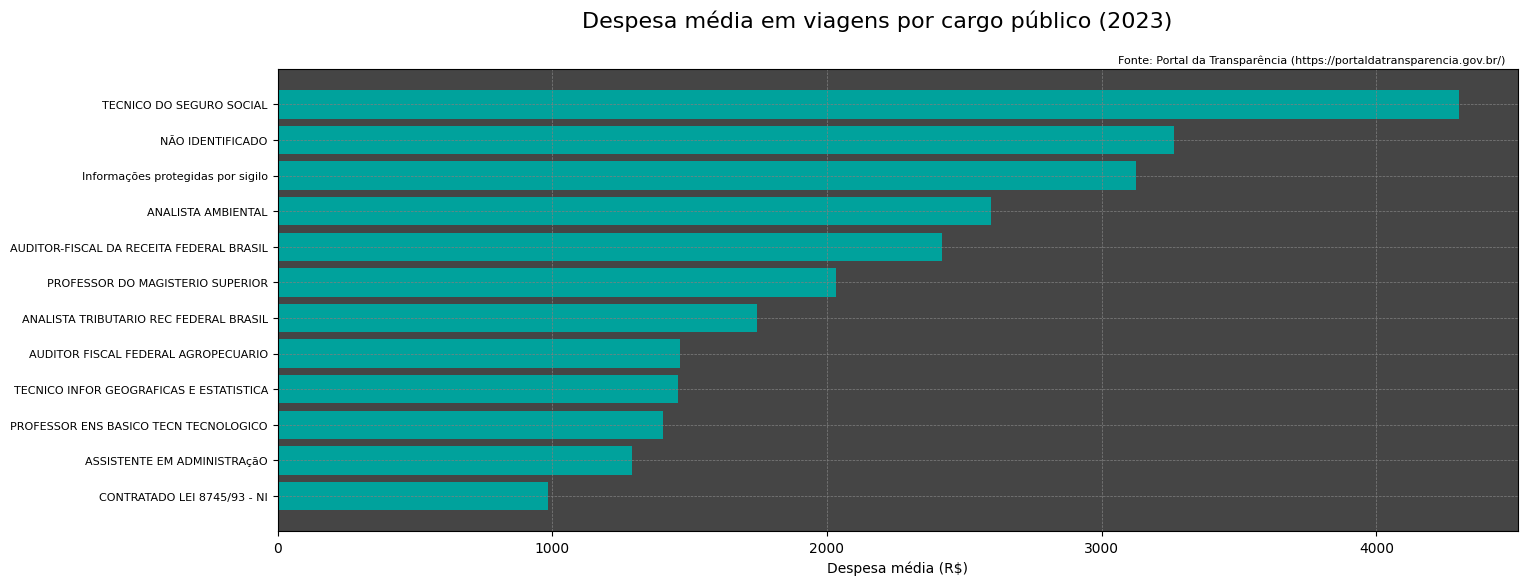

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

df_final = df_final.sort_values(by='despesa_media', ascending=False)

# Muda cor das barras e do fundo
ax.barh(df_final['Cargo'], df_final['despesa_media'], color='#00A29C')
ax.invert_yaxis()
ax.set_facecolor('#454545')

fig.suptitle('Despesa média em viagens por cargo público (2023)', fontsize=16)

plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência (https://portaldatransparencia.gov.br/)', fontsize=8)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)

plt.xlabel('Despesa média (R$)')
plt.show()

### Exemplo 2: despesa média x duração da viagem

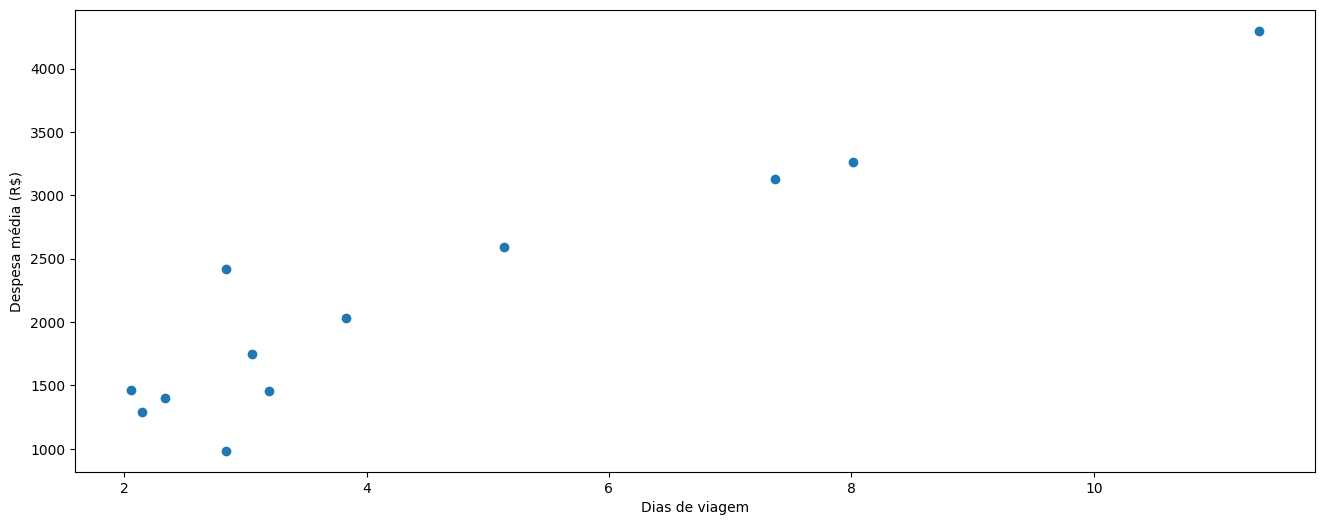

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(df_final['duracao_media'], df_final['despesa_media'])

plt.xlabel('Dias de viagem')
plt.ylabel('Despesa média (R$)')

plt.show()